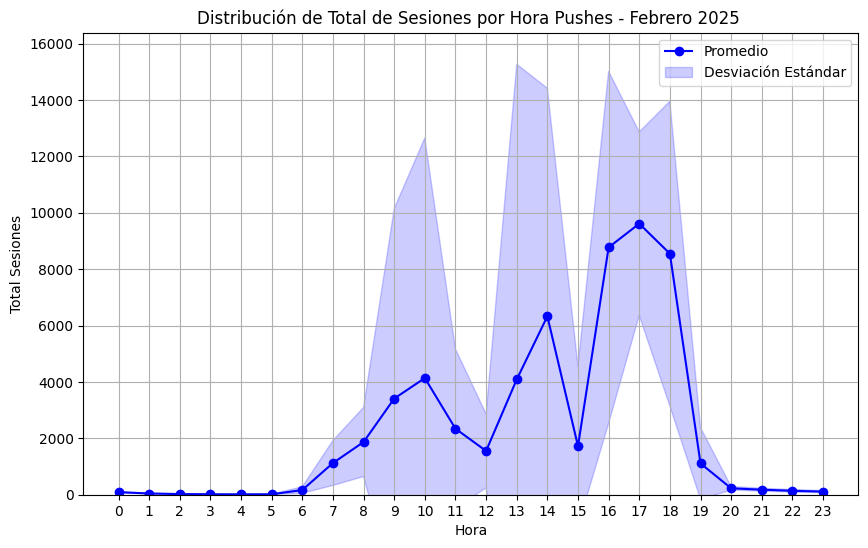

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargo los datos desde el archivo CSV
archivo_csv = "medidas_01.csv"

# Intentamos detectar el delimitador automáticamente
df = pd.read_csv(archivo_csv, sep=None, engine='python')

# Limpiamos nombres de columnas
df.columns = df.columns.str.strip()

# Verificamos si las columnas requeridas existen
if 'hora' not in df.columns or 'total_sesiones' not in df.columns:
    raise KeyError("Las columnas 'hora' y/o 'total_sesiones' no existen en el CSV. Verifica los nombres exactos.")

# Convertimos 'hora' a tipo numérico para asegurarnos de que se pueda agrupar correctamente
df['hora'] = pd.to_numeric(df['hora'], errors='coerce')

# Agrupamos los datos por hora y calculamos estadísticas descriptivas
df_grouped = df.groupby('hora')['total_sesiones'].describe()

# Redondeamos las columnas de interés
df_grouped['mean'] = df_grouped['mean'].round(2)
df_grouped['std'] = df_grouped['std'].round(2)

# Eliminamos las columnas innecesarias
df_grouped.drop(['25%', '75%'], axis=1, inplace=True)

# Renombramos columnas
df_grouped.rename(columns={'mean': 'promedio', '50%': 'mediana', 'count': 'cantidad'}, inplace=True)

# Guardamos los descriptores estadísticos en un CSV
df_grouped.to_csv("descriptores_estadisticos.csv", sep=';', encoding='utf-8-sig')

# Aseguramos que las horas sean enteros
df_grouped.index = df_grouped.index.astype(int)

# Creamos una secuencia completa de horas (0 a 23) para asegurar que se muestren todas
horas_completas = np.arange(0, 24, 1)  # De 0 a 23, intervalo de 1 hora

# Graficamos la distribución de "total_sesiones" por "hora"
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['promedio'], marker='o', linestyle='-', color='b', label='Promedio')
plt.fill_between(df_grouped.index, df_grouped['promedio'] - df_grouped['std'], df_grouped['promedio'] + df_grouped['std'], color='b', alpha=0.2, label='Desviación Estándar')

# Configuramos el eje X para mostrar cada hora
plt.xticks(horas_completas)  # Asegura que se muestren todas las horas en el eje X

# Aseguramos que el eje Y comience en 0
plt.ylim(0, None)

plt.xlabel('Hora')
plt.ylabel('Total Sesiones')
plt.title('Distribución de Total de Sesiones por Hora Pushes - Febrero 2025 ')
plt.legend()
plt.grid(True)

# Guardamos el gráfico como PNG
plt.savefig("grafico_total_sesiones_por_hora.png")

# Mostramos el gráfico
plt.show()

